<a href="https://colab.research.google.com/github/zahraniayudyaa/TUGAS-ML/blob/main/ch_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unsupervised Learning Techniques**
---
Bab ini membahas teknik unsupervised learning, yaitu metode pembelajaran mesin yang bekerja tanpa label data. Topik utama yang dibahas meliputi:
* Clustering: Mengelompokkan data yang serupa menjadi cluster.
* Anomaly Detection: Mendeteksi data yang tidak normal atau outlier.
* Density Estimation: Memperkirakan distribusi data.
* Gaussian Mixture Models: Model probabilistik untuk clustering dan anomaly detection.

Algoritma yang dibahas termasuk K-Means, DBSCAN, dan Gaussian Mixture Models (GMM).

# **1. Clustering**
---
Tujuan clustering adalah mengelompokkan instance yang serupa ke dalam cluster. Clustering digunakan untuk segmentasi pelanggan, analisis data, reduksi dimensi, deteksi anomali, dan segmentasi gambar.

# **2. K-Means**
---
Algoritma K-Means bekerja dengan mengelompokkan data ke dalam
k
k cluster berdasarkan jarak ke centroid. Algoritma ini cepat dan scalable, tetapi memerlukan penentuan jumlah cluster
k
k dan sensitif terhadap inisialisasi centroid.

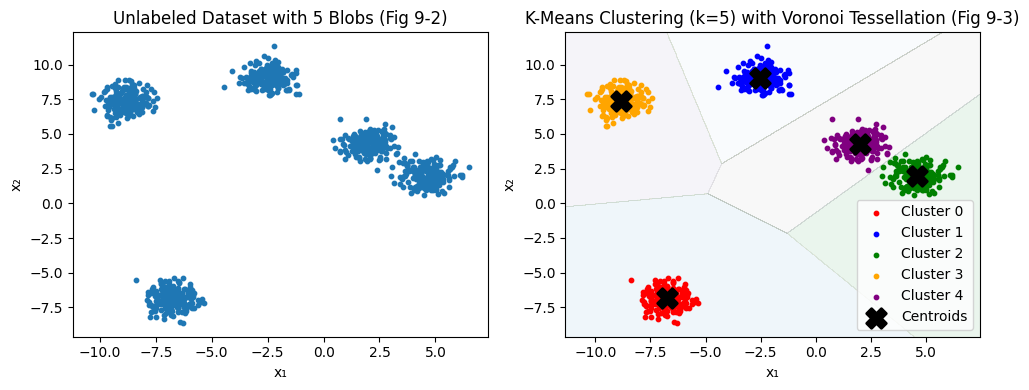

Contoh label cluster (10 pertama): [2 2 0 2 4 0 3 4 2 4]
Centroid: [[-6.76363502 -6.83888057]
 [-2.52218128  9.03156916]
 [ 4.61020325  1.96500287]
 [-8.82929199  7.37020647]
 [ 2.00893522  4.23781023]]
Prediksi untuk data baru: [4 2 4 4]
Distances to centroids:
 [[11.12980541  7.47023181  4.61033608 10.33419152  3.00726044]
 [13.17020799  8.94077463  1.61058353 12.99119957  2.44744847]
 [10.53415964  6.05046587  7.68026123  7.28555761  5.15961299]
 [10.06874564  6.54902332  7.62898522  7.59602239  5.30183143]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Membuat dataset dengan 5 blob seperti di Fig 9-2
X, y = make_blobs(n_samples=1000, centers=5, cluster_std=0.6, random_state=42)

# Visualisasi data sebelum clustering (Fig 9-2)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title("Unlabeled Dataset with 5 Blobs (Fig 9-2)")
plt.xlabel("x₁")
plt.ylabel("x₂")

# Inisialisasi dan pelatihan K-Means
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

# Visualisasi hasil clustering dengan decision boundaries (Voronoi tessellation)
plt.subplot(1, 2, 2)

# Plot decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.1, cmap='tab20c')

# Plot data points dengan warna cluster
colors = ['red', 'blue', 'green', 'orange', 'purple']
for i in range(k):
    cluster_points = X[y_pred == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                s=10, color=colors[i], label=f'Cluster {i}')

# Plot centroids dengan 'X'
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='X', s=200, c='black', linewidths=2, label='Centroids')

plt.title(f"K-Means Clustering (k={k}) with Voronoi Tessellation (Fig 9-3)")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.legend()
plt.tight_layout()
plt.show()

# Melihat label cluster
print("Contoh label cluster (10 pertama):", y_pred[:10])
print("Centroid:", kmeans.cluster_centers_)

# Prediksi cluster untuk data baru
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
new_pred = kmeans.predict(X_new)
print("Prediksi untuk data baru:", new_pred)
print("Distances to centroids:\n", kmeans.transform(X_new))

 1. Demonstrasi Algoritma K-Means

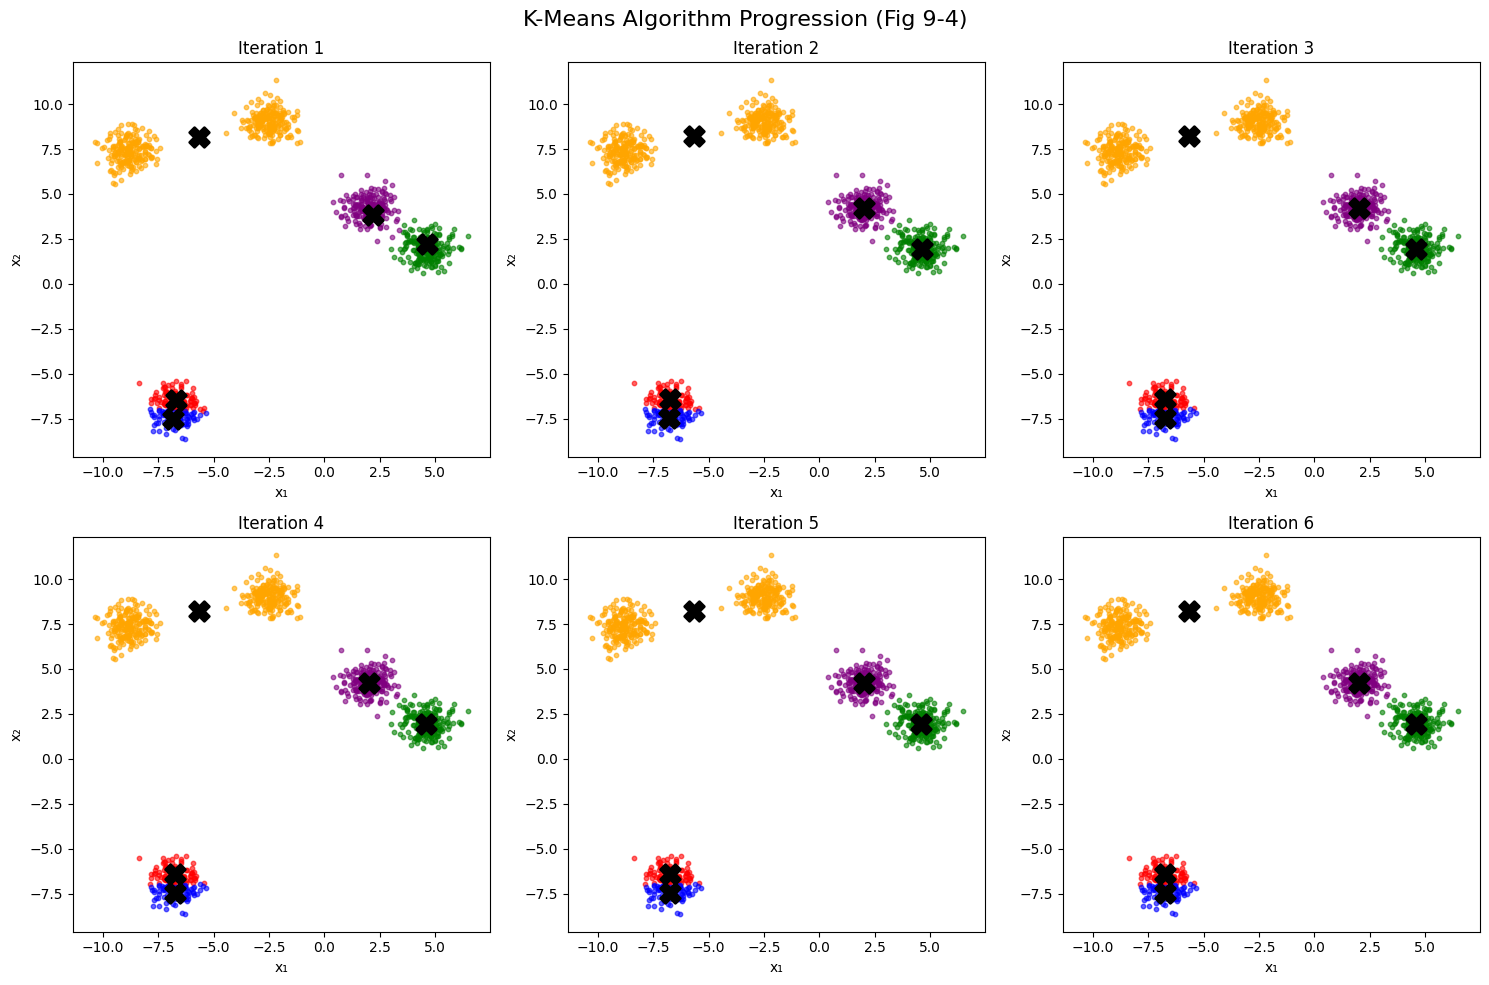

In [2]:
# Demonstrasi iterasi K-Means seperti pada Fig 9-4
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
n_iterations = 6

for iteration in range(n_iterations):
    # Inisialisasi random untuk 3 iterasi pertama
    if iteration < 3:
        kmeans_iter = KMeans(n_clusters=5, init='random', n_init=1,
                            max_iter=iteration+1, random_state=42)
        kmeans_iter.fit(X)
        y_pred_iter = kmeans_iter.predict(X)
        centroids = kmeans_iter.cluster_centers_
    else:
        # Untuk menunjukkan konvergensi
        kmeans_iter = KMeans(n_clusters=5, init='random', n_init=1,
                            max_iter=iteration+1, random_state=42)
        kmeans_iter.fit(X)
        y_pred_iter = kmeans_iter.predict(X)
        centroids = kmeans_iter.cluster_centers_

    # Plot
    row = iteration // 3
    col = iteration % 3
    ax = axes[row, col]

    # Plot data points
    colors = ['red', 'blue', 'green', 'orange', 'purple']
    for i in range(5):
        cluster_points = X[y_pred_iter == i]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1],
                  s=10, color=colors[i], alpha=0.6)

    # Plot centroids
    ax.scatter(centroids[:, 0], centroids[:, 1],
              marker='X', s=200, c='black', linewidths=2)

    ax.set_title(f"Iteration {iteration+1}")
    ax.set_xlabel("x₁")
    ax.set_ylabel("x₂")
    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_min, y_max])

plt.suptitle("K-Means Algorithm Progression (Fig 9-4)", fontsize=16)
plt.tight_layout()
plt.show()

2. Masalah Inisialisasi Centroid

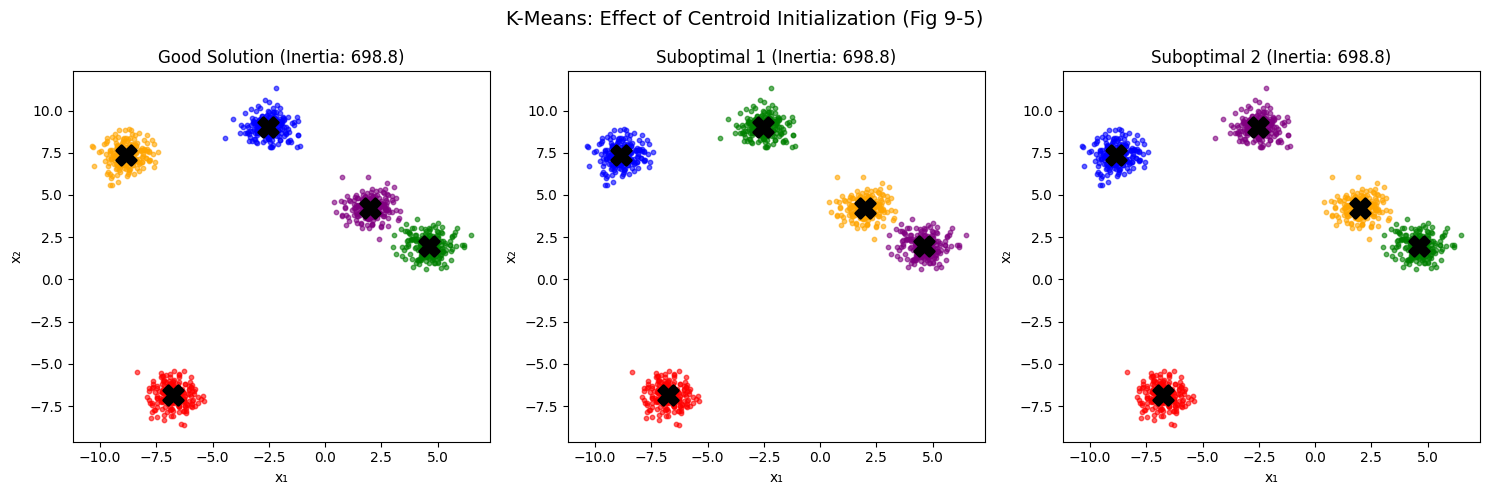

In [3]:
# Demonstrasi suboptimal solutions karena inisialisasi buruk
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Inisialisasi yang baik (Fig 9-3)
kmeans_good = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)
kmeans_good.fit(X)
y_pred_good = kmeans_good.predict(X)
inertia_good = kmeans_good.inertia_

# Suboptimal solution 1
kmeans_bad1 = KMeans(n_clusters=5, init=np.array([[-2, 1], [-1, 1], [0, 1], [1, 1], [2, 1]]),
                     n_init=1, random_state=42)
kmeans_bad1.fit(X)
y_pred_bad1 = kmeans_bad1.predict(X)
inertia_bad1 = kmeans_bad1.inertia_

# Suboptimal solution 2
kmeans_bad2 = KMeans(n_clusters=5, init=np.array([[-2, -1], [-2, 0], [-2, 1], [-2, 2], [-2, 3]]),
                     n_init=1, random_state=42)
kmeans_bad2.fit(X)
y_pred_bad2 = kmeans_bad2.predict(X)
inertia_bad2 = kmeans_bad2.inertia_

# Plot ketiga solusi
for idx, (kmeans_model, y_pred, title, ax) in enumerate([
    (kmeans_good, y_pred_good, f"Good Solution (Inertia: {inertia_good:.1f})", axes[0]),
    (kmeans_bad1, y_pred_bad1, f"Suboptimal 1 (Inertia: {inertia_bad1:.1f})", axes[1]),
    (kmeans_bad2, y_pred_bad2, f"Suboptimal 2 (Inertia: {inertia_bad2:.1f})", axes[2])
]):
    colors = ['red', 'blue', 'green', 'orange', 'purple']
    for i in range(5):
        cluster_points = X[y_pred == i]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1],
                  s=10, color=colors[i], alpha=0.6)

    ax.scatter(kmeans_model.cluster_centers_[:, 0],
               kmeans_model.cluster_centers_[:, 1],
               marker='X', s=200, c='black', linewidths=2)

    ax.set_title(title)
    ax.set_xlabel("x₁")
    ax.set_ylabel("x₂")

plt.suptitle("K-Means: Effect of Centroid Initialization (Fig 9-5)", fontsize=14)
plt.tight_layout()
plt.show()

3. Mini-batch K-Means vs Regular K-Means

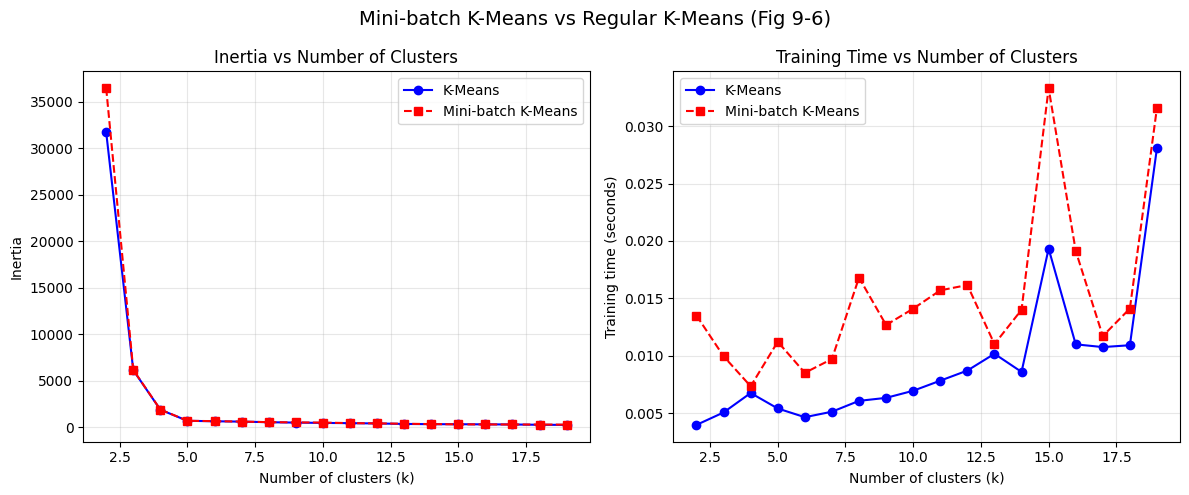

In [4]:
from sklearn.cluster import MiniBatchKMeans
import time

# Perbandingan inertia dan waktu training
k_values = range(2, 20)
inertias_kmeans = []
inertias_minibatch = []
times_kmeans = []
times_minibatch = []

for k in k_values:
    # Regular K-Means
    start_time = time.time()
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    times_kmeans.append(time.time() - start_time)
    inertias_kmeans.append(kmeans.inertia_)

    # Mini-batch K-Means
    start_time = time.time()
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=100)
    minibatch_kmeans.fit(X)
    times_minibatch.append(time.time() - start_time)
    inertias_minibatch.append(minibatch_kmeans.inertia_)

# Plot perbandingan inertia (kiri)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(k_values, inertias_kmeans, 'b-o', label='K-Means')
axes[0].plot(k_values, inertias_minibatch, 'r--s', label='Mini-batch K-Means')
axes[0].set_xlabel('Number of clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Inertia vs Number of Clusters')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot perbandingan waktu training (kanan)
axes[1].plot(k_values, times_kmeans, 'b-o', label='K-Means')
axes[1].plot(k_values, times_minibatch, 'r--s', label='Mini-batch K-Means')
axes[1].set_xlabel('Number of clusters (k)')
axes[1].set_ylabel('Training time (seconds)')
axes[1].set_title('Training Time vs Number of Clusters')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.suptitle('Mini-batch K-Means vs Regular K-Means (Fig 9-6)', fontsize=14)
plt.tight_layout()
plt.show()

# **3. DBSCAN**
---
DBSCAN mengidentifikasi cluster sebagai area dengan kepadatan tinggi. Algoritma ini dapat menemukan cluster dengan bentuk apa pun dan tidak memerlukan penentuan jumlah cluster sebelumnya.

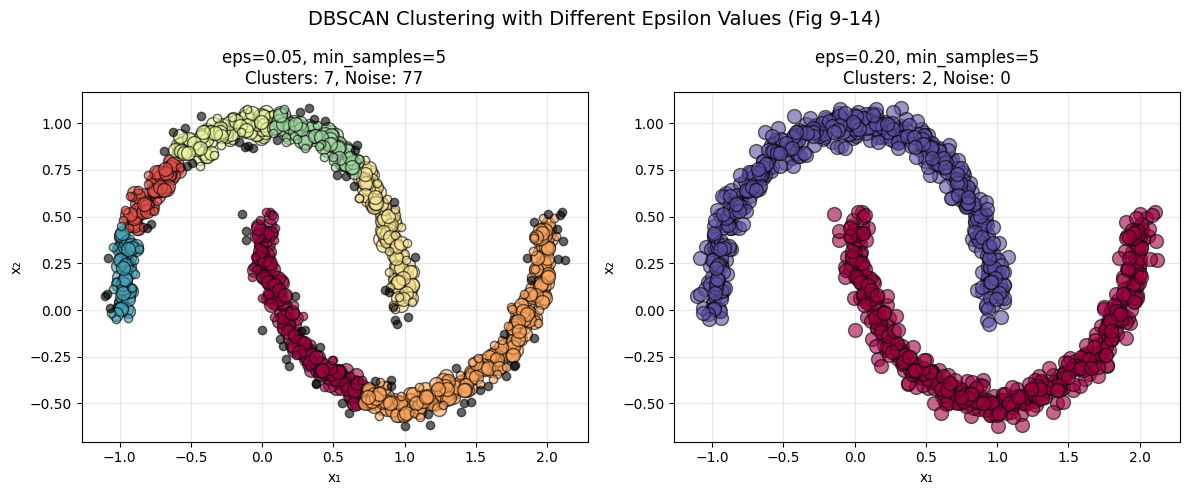

In [5]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# Membuat dataset bulan
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

# Visualisasi DBSCAN dengan dua nilai eps berbeda (Fig 9-14)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

eps_values = [0.05, 0.2]
titles = ['eps=0.05, min_samples=5', 'eps=0.20, min_samples=5']

for idx, (eps, ax) in enumerate(zip(eps_values, axes)):
    # Inisialisasi dan pelatihan DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=5)
    y_dbscan = dbscan.fit_predict(X_moons)

    # Identifikasi core points, border points, dan noise
    core_samples_mask = np.zeros_like(y_dbscan, dtype=bool)
    core_samples_mask[dbscan.core_sample_indices_] = True
    n_clusters = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
    n_noise = list(y_dbscan).count(-1)

    # Visualisasi
    unique_labels = set(y_dbscan)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Noise points (hitam)
            col = [0, 0, 0, 1]

        class_member_mask = (y_dbscan == k)

        # Core points
        xy = X_moons[class_member_mask & core_samples_mask]
        ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                markeredgecolor='k', markersize=10, alpha=0.6)

        # Border points
        xy = X_moons[class_member_mask & ~core_samples_mask]
        ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                markeredgecolor='k', markersize=6, alpha=0.6)

    ax.set_title(f'{titles[idx]}\nClusters: {n_clusters}, Noise: {n_noise}')
    ax.set_xlabel("x₁")
    ax.set_ylabel("x₂")
    ax.grid(True, alpha=0.3)

plt.suptitle("DBSCAN Clustering with Different Epsilon Values (Fig 9-14)", fontsize=14)
plt.tight_layout()
plt.show()

# **4. Gaussian Mixture Models (GMM)**
---
GMM adalah model probabilistik yang mengasumsikan data dihasilkan dari campuran beberapa distribusi Gaussian. GMM dapat digunakan untuk clustering, estimasi kepadatan, dan deteksi anomali.

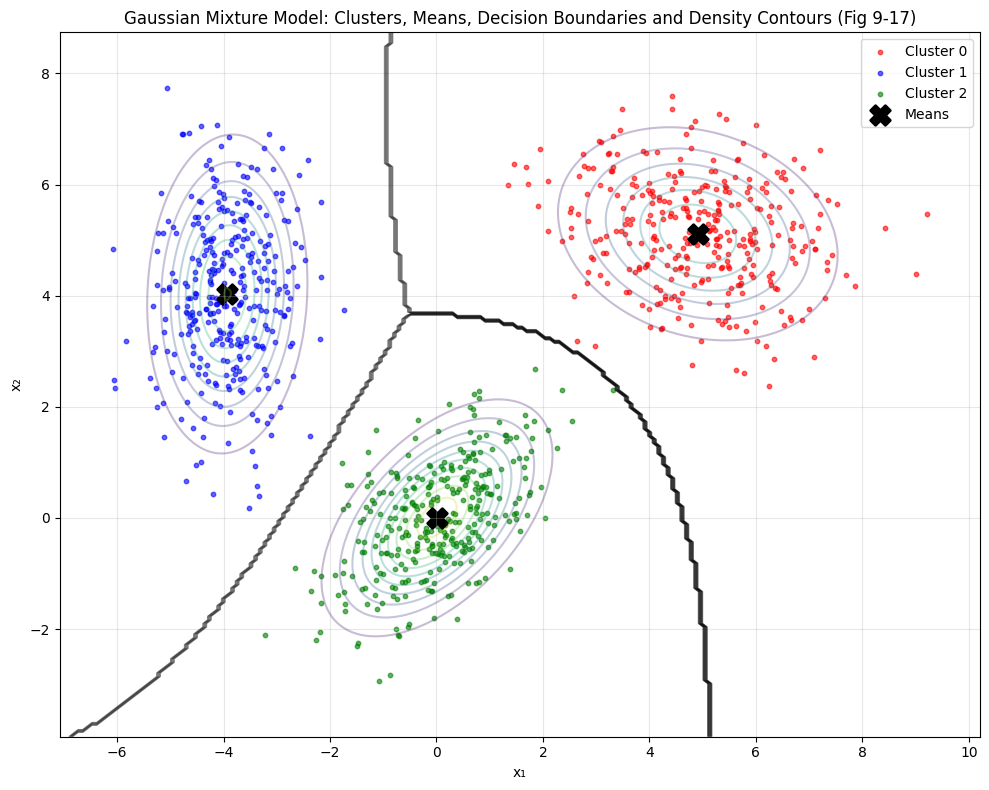

Cluster weights: [0.333 0.333 0.333]
Cluster means:
 [[ 4.910e+00  5.113e+00]
 [-3.930e+00  4.030e+00]
 [ 1.000e-02  1.000e-03]]
Covariances shape: (3, 2, 2)

Sample predictions (first 10):
Hard clustering: [2 2 2 2 2 2 2 2 2 2]
Soft clustering probabilities (first 3 samples):
 [[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]

Generated samples from GMM:
X_new:
 [[ 4.457  6.725]
 [ 5.155  4.815]
 [ 3.042  6.399]
 [-3.575  3.369]
 [ 0.635  0.17 ]
 [ 0.696 -1.132]
 [ 1.788  1.196]
 [ 0.752  1.015]
 [ 1.47   0.089]
 [-1.17  -1.355]]
y_new: [0 0 0 1 2 2 2 2 2 2]


In [6]:
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal

# Membuat data dengan distribusi Gaussian yang berbeda
np.random.seed(42)
n_samples = 1000

# Generate data from 3 different Gaussian distributions
X1 = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], n_samples//3)
X2 = np.random.multivariate_normal([5, 5], [[2, -0.5], [-0.5, 1]], n_samples//3)
X3 = np.random.multivariate_normal([-4, 4], [[0.5, 0], [0, 2]], n_samples//3)
X_gmm = np.vstack([X1, X2, X3])

# Inisialisasi dan pelatihan GMM
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X_gmm)
y_gmm = gm.predict(X_gmm)

# Visualisasi hasil GMM dengan decision boundaries dan density contours (Fig 9-17)
fig, ax = plt.subplots(figsize=(10, 8))

# Plot data points dengan warna cluster
colors = ['red', 'blue', 'green']
for i in range(3):
    cluster_points = X_gmm[y_gmm == i]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1],
              s=10, color=colors[i], alpha=0.6, label=f'Cluster {i}')

# Plot means
ax.scatter(gm.means_[:, 0], gm.means_[:, 1],
          marker='X', s=200, c='black', linewidths=2, label='Means')

# Plot decision boundaries
x_min, x_max = X_gmm[:, 0].min() - 1, X_gmm[:, 0].max() + 1
y_min, y_max = X_gmm[:, 1].min() - 1, X_gmm[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = gm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, colors='black', linewidths=1, alpha=0.5)

# Plot density contours
scores = gm.score_samples(np.c_[xx.ravel(), yy.ravel()])
scores = np.exp(scores).reshape(xx.shape)
ax.contour(xx, yy, scores, levels=10, cmap='viridis', alpha=0.3)

ax.set_title("Gaussian Mixture Model: Clusters, Means, Decision Boundaries and Density Contours (Fig 9-17)")
ax.set_xlabel("x₁")
ax.set_ylabel("x₂")
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Melihat parameter model
print("Cluster weights:", gm.weights_.round(3))
print("Cluster means:\n", gm.means_.round(3))
print("Covariances shape:", gm.covariances_.shape)

# Prediksi cluster
print("\nSample predictions (first 10):")
print("Hard clustering:", y_gmm[:10])
print("Soft clustering probabilities (first 3 samples):\n", gm.predict_proba(X_gmm[:3]).round(3))

# Generate new samples from the GMM
X_new, y_new = gm.sample(10)
print("\nGenerated samples from GMM:")
print("X_new:\n", X_new.round(3))
print("y_new:", y_new)

### **Anomaly Detection dengan Gaussian Mixture**

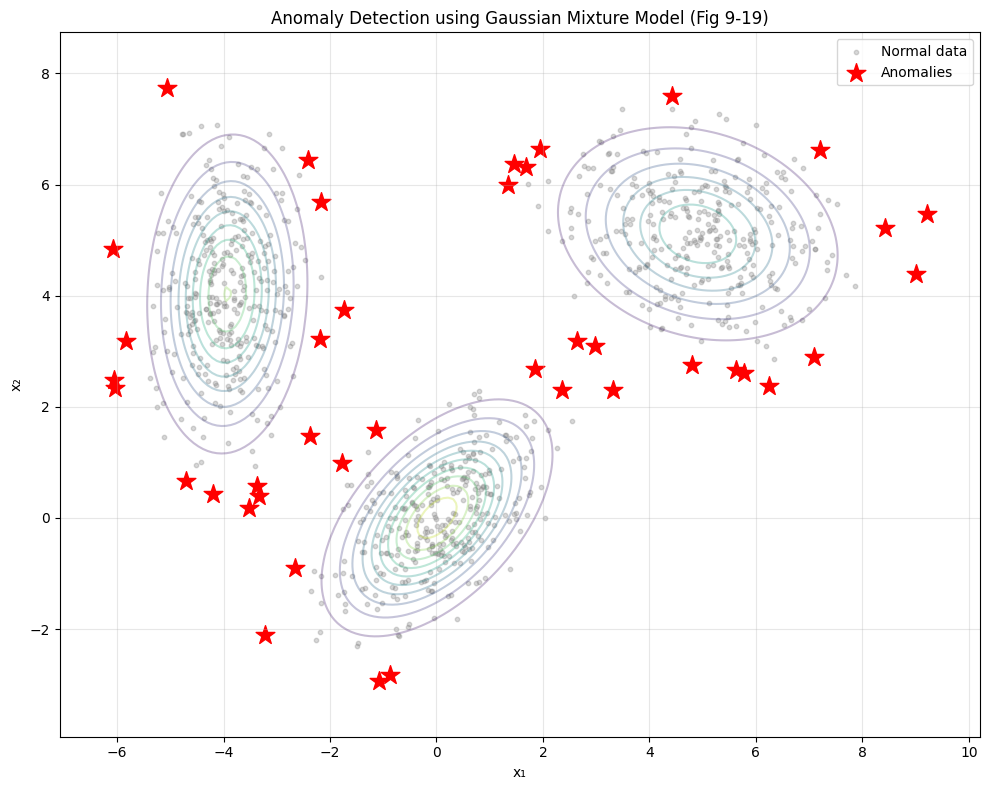

Number of anomalies detected: 40 (4.0%)
Density threshold: -6.136


In [7]:
# Anomaly detection menggunakan GMM (Fig 9-19)
fig, ax = plt.subplots(figsize=(10, 8))

# Plot semua data
ax.scatter(X_gmm[:, 0], X_gmm[:, 1], s=10, alpha=0.3, c='gray', label='Normal data')

# Deteksi anomali (4% terendah dalam density)
densities = gm.score_samples(X_gmm)
density_threshold = np.percentile(densities, 4)
anomalies = X_gmm[densities < density_threshold]

# Plot anomali sebagai bintang
ax.scatter(anomalies[:, 0], anomalies[:, 1],
          marker='*', s=200, c='red', label='Anomalies')

# Plot density contours untuk visualisasi
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
scores = gm.score_samples(np.c_[xx.ravel(), yy.ravel()])
scores = np.exp(scores).reshape(xx.shape)
ax.contour(xx, yy, scores, levels=10, cmap='viridis', alpha=0.3)

ax.set_title("Anomaly Detection using Gaussian Mixture Model (Fig 9-19)")
ax.set_xlabel("x₁")
ax.set_ylabel("x₂")
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Number of anomalies detected: {len(anomalies)} ({len(anomalies)/len(X_gmm)*100:.1f}%)")
print(f"Density threshold: {density_threshold:.3f}")

### **Menentukan Jumlah Cluster Optimal**

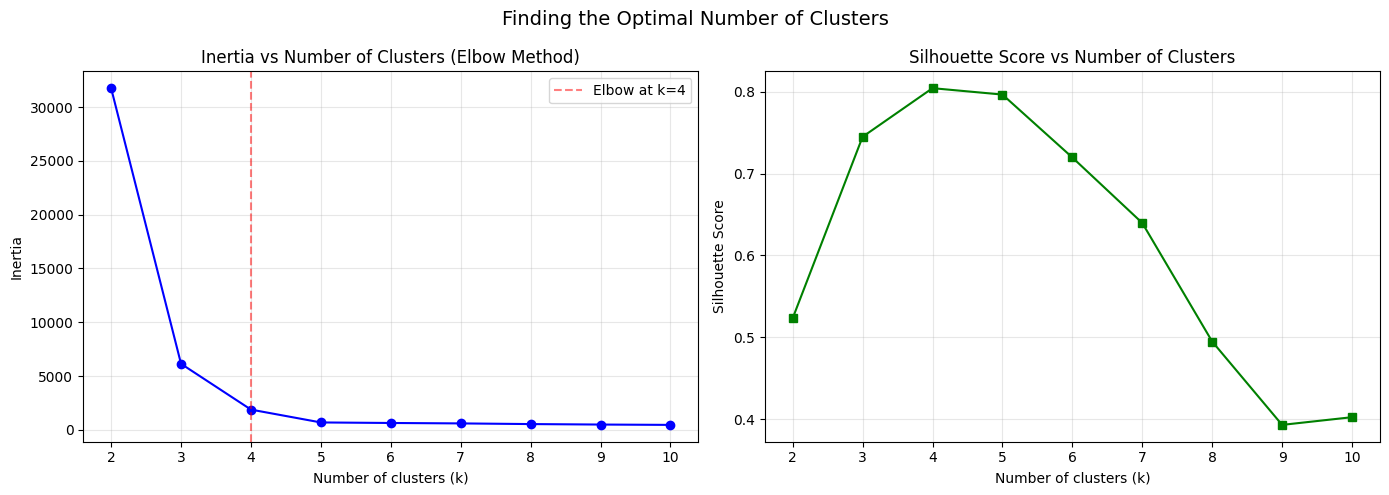

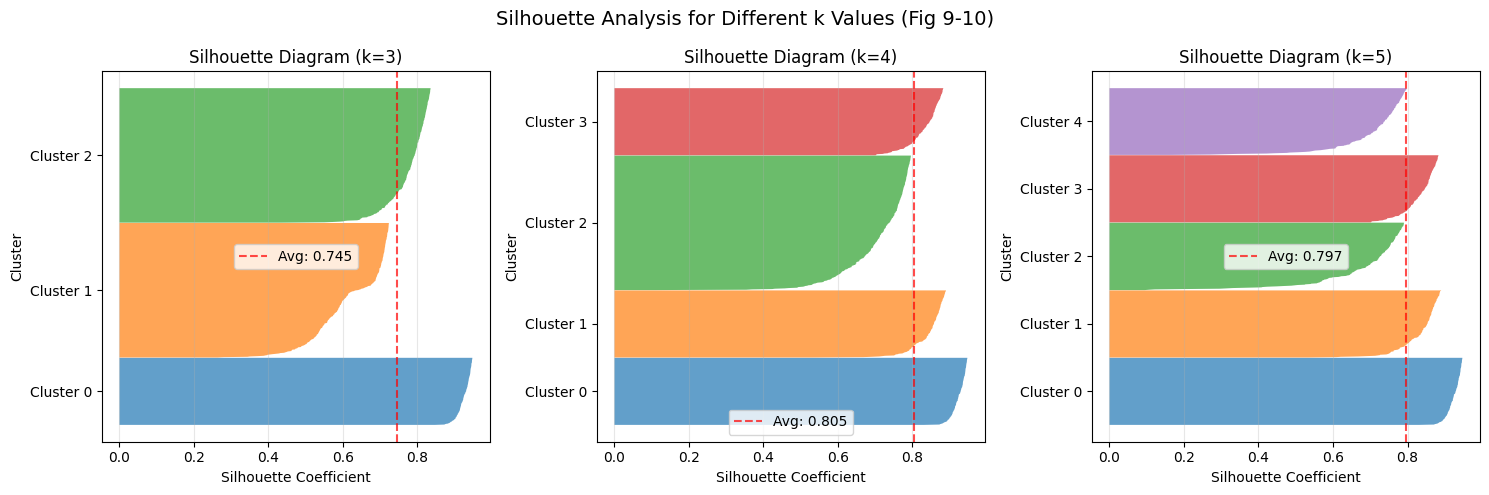

In [8]:
from sklearn.metrics import silhouette_score, silhouette_samples

# Analisis inertia untuk menentukan k optimal
k_range = range(2, 11)
inertias = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(X)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, y_pred))

# Plot inertia vs k dengan elbow method (Fig 9-8)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(k_range, inertias, 'b-o')
axes[0].set_xlabel('Number of clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Inertia vs Number of Clusters (Elbow Method)')
axes[0].axvline(x=4, color='r', linestyle='--', alpha=0.5, label='Elbow at k=4')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Plot silhouette scores (Fig 9-9)
axes[1].plot(k_range, silhouette_scores, 'g-s')
axes[1].set_xlabel('Number of clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score vs Number of Clusters')
axes[1].grid(True, alpha=0.3)

plt.suptitle('Finding the Optimal Number of Clusters', fontsize=14)
plt.tight_layout()
plt.show()

# Silhouette diagrams untuk k=3, 4, 5 (Fig 9-10)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, k in enumerate([3, 4, 5]):
    ax = axes[idx]

    kmeans = KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(X)

    # Hitung silhouette scores
    silhouette_vals = silhouette_samples(X, y_pred)
    y_ticks = []
    y_lower = y_upper = 0

    for i in range(k):
        cluster_silhouette_vals = silhouette_vals[y_pred == i]
        cluster_silhouette_vals.sort()

        y_upper += len(cluster_silhouette_vals)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                        0, cluster_silhouette_vals,
                        alpha=0.7)

        y_ticks.append((y_lower + y_upper) / 2)
        y_lower += len(cluster_silhouette_vals)

    # Plot garis silhouette score rata-rata
    avg_score = np.mean(silhouette_vals)
    ax.axvline(x=avg_score, color='red', linestyle='--',
               alpha=0.7, label=f'Avg: {avg_score:.3f}')

    ax.set_xlabel('Silhouette Coefficient')
    ax.set_ylabel('Cluster')
    ax.set_yticks(y_ticks)
    ax.set_yticklabels([f'Cluster {i}' for i in range(k)])
    ax.set_title(f'Silhouette Diagram (k={k})')
    ax.legend()
    ax.grid(True, alpha=0.3, axis='x')

plt.suptitle('Silhouette Analysis for Different k Values (Fig 9-10)', fontsize=14)
plt.tight_layout()
plt.show()

# **Aplikasi Clustering**
---
## **1. Segmentasi Gambar dengan K-Means**

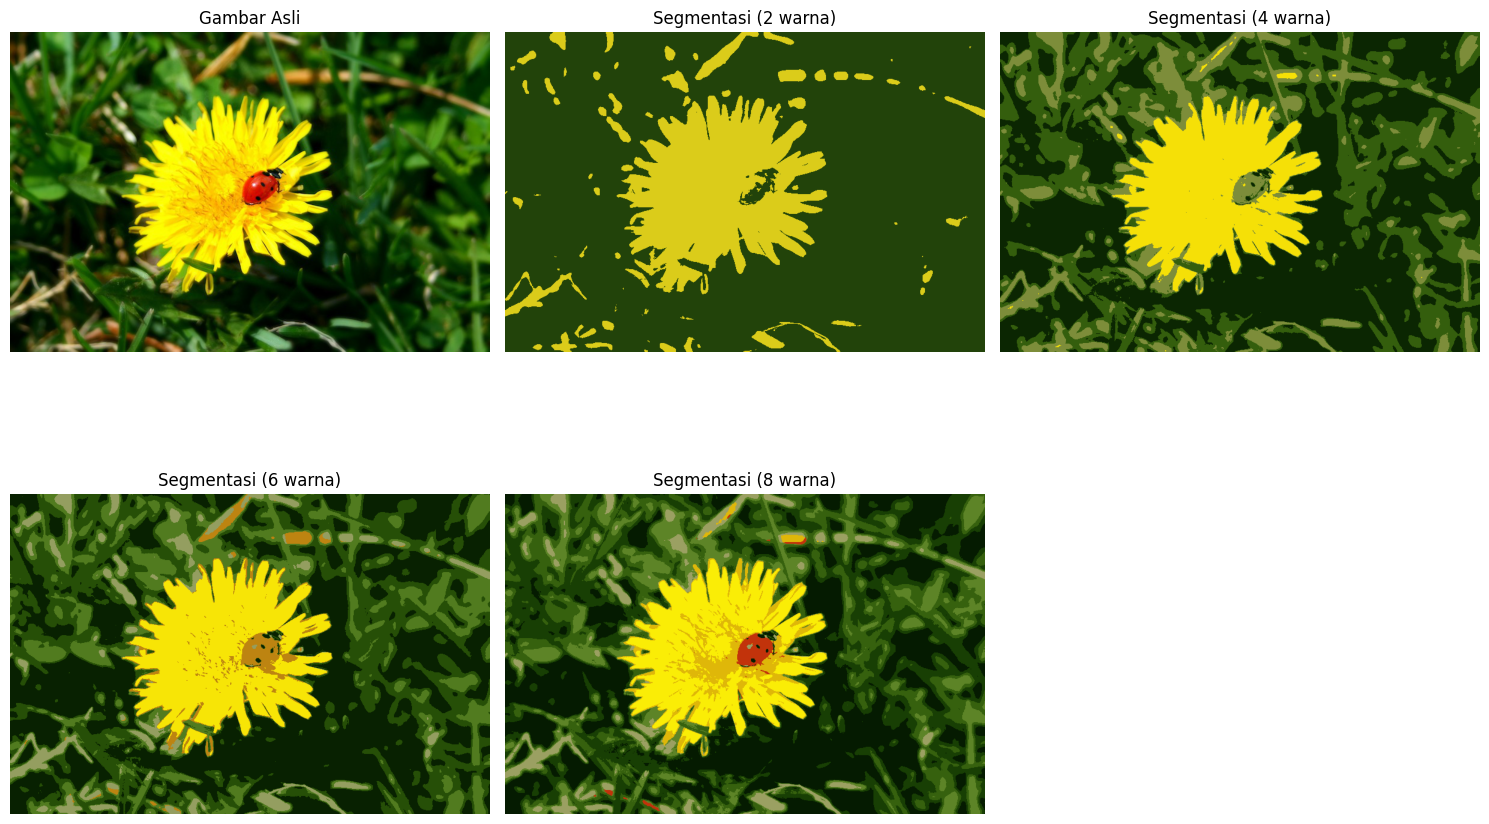

In [9]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
from sklearn.cluster import KMeans
import numpy as np

# Memastikan file 'ladybug.png' tersedia
if not os.path.exists("ladybug.png"):
    # Mengunduh gambar jika belum ada
    !wget -q https://raw.githubusercontent.com/ageron/handson-ml2/master/images/unsupervised_learning/ladybug.png

# Memuat gambar
image = imread("ladybug.png")
image_shape = image.shape

# Mengubah gambar menjadi vektor warna
X = image.reshape(-1, 3)

n_colors_list = [2, 4, 6, 8]

# Membuat subplot: 1 gambar asli + 4 gambar tersegmentasi
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten() # Meratakan array axes agar mudah diakses

# Menampilkan gambar asli di subplot pertama
axes[0].imshow(image)
axes[0].set_title("Gambar Asli")
axes[0].axis('off')

# Melakukan clustering untuk setiap jumlah warna dan menampilkan hasilnya
for i, n_colors in enumerate(n_colors_list):
    kmeans = KMeans(n_clusters=n_colors, random_state=42, n_init=10)
    kmeans.fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_img = segmented_img.reshape(image_shape)

    # Menampilkan gambar tersegmentasi
    # Mengalikan dengan 255 sebelum konversi ke uint8
    axes[i + 1].imshow((segmented_img * 255).astype('uint8'))
    axes[i + 1].set_title(f"Segmentasi ({n_colors} warna)")
    axes[i + 1].axis('off')

# Menyembunyikan subplot yang tidak terpakai jika ada (misal, untuk 2x3, hanya 5 yang terisi)
for i in range(len(n_colors_list) + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## **2. Clustering untuk Preprocessing**

In [10]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Memuat dataset digits
X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

# Membuat pipeline dengan K-Means dan Logistic Regression
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50)),
    ("log_reg", LogisticRegression(max_iter=1000)),
])

# Melatih model
pipeline.fit(X_train, y_train)
print("Akurasi pada test set:", pipeline.score(X_test, y_test))

Akurasi pada test set: 0.9533333333333334


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Deteksi Anomali dengan Gaussian Mixture**
---

In [11]:
# Deteksi anomali menggunakan GMM
# Re-generate X from make_moons to ensure correct feature count for gm
from sklearn.datasets import make_moons
X_moons, _ = make_moons(n_samples=1000, noise=0.05)

densities = gm.score_samples(X_moons)
density_threshold = np.percentile(densities, 4)
anomalies = X_moons[densities < density_threshold]

print("Jumlah anomali terdeteksi:", len(anomalies))

Jumlah anomali terdeteksi: 40
